## ITP4514 - Written Test (Suggested Solutions)

### Q1

#### Q1(a)
AI computing focuses on what to execute, defines program logic, but not detailed control flow whereas
traditional computing focuses on how to execute, defines control flow as statements that change a program state.

In [1]:
# Q1(b)

import math

def nCr(n,r):
    f = math.factorial
    return int(f(n) / f(r) / f(n-r))

In [8]:
# Print Triangle of Combinations
n = int(input('Enter the size of triangle: '))
for i in range(0, n+1):
    print(' '*(n-i+1), end=' ')
    for j in range(0, i+1):
        print(nCr(i,j), end=' ')
    print()

Enter the size of triangle: 6
        1 
       1 1 
      1 2 1 
     1 3 3 1 
    1 4 6 4 1 
   1 5 10 10 5 1 
  1 6 15 20 15 6 1 


### Q2

In [1]:
# Q2(a)(i)
import numpy as np
arr = np.random.randint(11, 90, size=(6,8))
arr

array([[34, 85, 71, 43, 73, 16, 72, 71],
       [13, 35, 36, 14, 79, 22, 28, 50],
       [17, 70, 24, 51, 23, 89, 11, 39],
       [46, 35, 65, 62, 66, 65, 52, 72],
       [34, 33, 51, 12, 28, 50, 47, 57],
       [32, 22, 85, 36, 88, 67, 89, 52]])

In [2]:
# Q2(a)(ii)
arr2 = arr.flatten()[::2].reshape(4,6)
arr2

array([[34, 71, 73, 72, 13, 36],
       [79, 28, 17, 24, 23, 11],
       [46, 65, 66, 52, 34, 51],
       [28, 47, 32, 85, 88, 89]])

In [6]:
# Q2(a)(iii)
arr3 = arr[:, 3:6]
arr3

array([[43, 73, 16],
       [14, 79, 22],
       [51, 23, 89],
       [62, 66, 65],
       [12, 28, 50],
       [36, 88, 67]])

In [7]:
# Q2(b)
import pandas as pd
from pandas import DataFrame

data = {'Apples': [200, 152, 126, 217, 176],
        'Bananas': [155, 182, 169, 152, 174],
        'Cherries': [189, 174, 151, 160, 187],
        'Grapes': [254, 230, 184, 242, 176],
        'Oranges': [340, 320, 210, 298, 169]}
supermarkets = ['ParknShop', 'Gateway', 'City Super', 'Q Club', '3hree Sixty']
sales = DataFrame(data, index=supermarkets)
sales

Apples  Bananas  Cherries  Grapes  Oranges
ParknShop       200      155       189     254      340
Gateway         152      182       174     230      320
City Super      126      169       151     184      210
Q Club          217      152       160     242      298
3hree Sixty     176      174       187     176      169

In [8]:
# Q2(b)(i)
sales[sales['Cherries']<170]

Apples  Bananas  Cherries  Grapes  Oranges
City Super     126      169       151     184      210
Q Club         217      152       160     242      298

In [10]:
# Q2(b)(ii)
sales['Mean'] = sales.mean(axis=1)
sales

Apples  Bananas  Cherries  Grapes  Oranges  Total   Mean
ParknShop       200      155       189     254      340    NaN  227.6
Gateway         152      182       174     230      320    NaN  211.6
City Super      126      169       151     184      210    NaN  168.0
Q Club          217      152       160     242      298    NaN  213.8
3hree Sixty     176      174       187     176      169    NaN  176.4

### Q3

#### Q3(a)
Blind search examines each node of the tree in turn until the goal is reached, there is no information about the cost of navigating between the nodes.<br>
Heuristic search makes use of domain knowledge, such as the cost in the travelling salesman problem, to guide the search. It’s more efficient.

In [1]:
# Q3(b)
graph = {
  'A' : ['B','C'],
  'B' : ['E', 'G'],
  'C' : ['D','F'],
  'D' : ['F'],
  'E' : ['G'],
  'F' : [],
  'G' : []
}

In [2]:
def breadth_first(graph, start, end):
    visited = []
    queue = []

    visited.append(start)
    queue.append(start)

    while queue:
        s = queue.pop(0) 
        print(s, end='')
        if s == end: break

        for neighbour in graph[s]:
            if neighbour not in visited:
                visited.append(neighbour)
                queue.append(neighbour)

        if len(queue) > 0: print(' > ', end='')

In [3]:
breadth_first(graph, 'A', 'G')

A > B > C > E > G

#### Q3(c)
- Best First Search
- A* Search

### Q4

In [10]:
# Q4(a) - N-Queen with CSP (Given)

from constraint import *

n = 4
problem = Problem()
cols = range(1, n+1)
rows = range(1, n+1)
problem.addVariables(cols, rows)

for col1 in cols:
    for col2 in cols:
        if col1 < col2:
            problem.addConstraint(lambda row1, row2, col1=col1, col2=col2:
                abs(row1-row2) != abs(col1-col2) and
                row1 != row2, (col1, col2))

solutions = problem.getSolutions()
for sol in solutions:
    print(sol)

print('\nSolutions found : %i' % len(solutions))

{1: 3, 2: 1, 3: 4, 4: 2}
{1: 2, 2: 4, 3: 1, 4: 3}

Solutions found : 2


In [11]:
# N-Rook with CSP

n = 4
problem = Problem()
cols = range(1, n+1)
rows = range(1, n+1)
problem.addVariables(cols, rows)

for col1 in cols:
    for col2 in cols:
        if col1 < col2:
            problem.addConstraint(lambda row1, row2, col1=col1, col2=col2:
                row1 != row2, (col1, col2))

solutions = problem.getSolutions()
for sol in solutions:
    print(sol)
print('Solutions found : %i' % len(solutions))

{1: 4, 2: 3, 3: 2, 4: 1}
{1: 4, 2: 3, 3: 1, 4: 2}
{1: 4, 2: 2, 3: 3, 4: 1}
{1: 4, 2: 2, 3: 1, 4: 3}
{1: 4, 2: 1, 3: 2, 4: 3}
{1: 4, 2: 1, 3: 3, 4: 2}
{1: 3, 2: 4, 3: 1, 4: 2}
{1: 3, 2: 4, 3: 2, 4: 1}
{1: 3, 2: 2, 3: 4, 4: 1}
{1: 3, 2: 2, 3: 1, 4: 4}
{1: 3, 2: 1, 3: 2, 4: 4}
{1: 3, 2: 1, 3: 4, 4: 2}
{1: 2, 2: 3, 3: 1, 4: 4}
{1: 2, 2: 3, 3: 4, 4: 1}
{1: 2, 2: 4, 3: 3, 4: 1}
{1: 2, 2: 4, 3: 1, 4: 3}
{1: 2, 2: 1, 3: 4, 4: 3}
{1: 2, 2: 1, 3: 3, 4: 4}
{1: 1, 2: 2, 3: 4, 4: 3}
{1: 1, 2: 2, 3: 3, 4: 4}
{1: 1, 2: 3, 3: 2, 4: 4}
{1: 1, 2: 3, 3: 4, 4: 2}
{1: 1, 2: 4, 3: 3, 4: 2}
{1: 1, 2: 4, 3: 2, 4: 3}
Solutions found : 24


In [13]:
# Q4(b) Given
from kanren import *
from unification.match import *

n = var('n')

@match(0)
def fib(n):
    return 0

@match(1)
def fib(n):
    return 1

@match(n)
def fib(n):
    return fib(n - 1) + fib(n - 2)

In [14]:
fib(10)

55

In [24]:
from kanren import *
from unification.match import *

n = var('n')

@match(1)
def gs(n):
    return 11

@match(n)
def gs(n):
    return gs(n - 1) * 2

In [26]:
gs(5)

176

#### Q4(c)
A constraint satisfaction problem consists of three components, X, D, and C:
1. <b>X</b> is a set of variables, {X1, . . . ,Xn}.
1. <b>D</b> is a set of domains, {D1, . . . ,Dn}, one for each variable.
1. <b>C</b> is a set of constraints that specify allowable combinations of values.

### Q5

#### Q5(a)
In probabilistic reasoning, we combine probability theory with logic to handle the uncertainty.

#### Q5(b) <i>File : Test_Q5b_Ans.png</i>

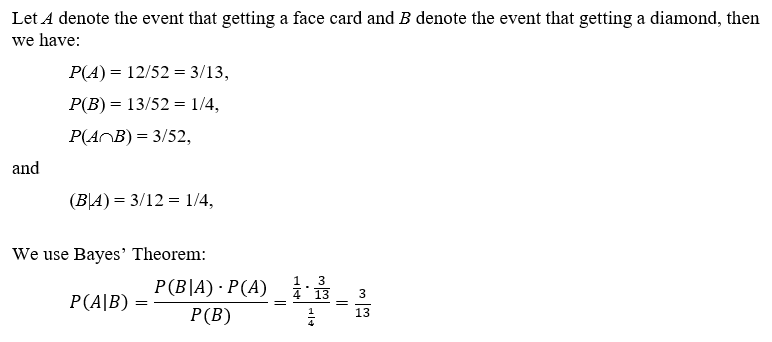

In [6]:
### Q5(c)
import torch
import pyro

def EA_marks():
    lab0 = pyro.sample('Lab Completion', pyro.distributions.Bernoulli(0.7))
    lab = 'Lab completed' if lab0.item() == 1.0 else 'Lab not completed'
    mean_mark = {'Lab completed': 80.0, 'Lab not completed': 60.0}[lab]
    scale_mark = {'Lab completed': 10.0, 'Lab not completed': 15.0}[lab]
    mark = pyro.sample('EA Mark', pyro.distributions.Normal(mean_mark, scale_mark))
    return lab, mark.item()

for _ in range(10):
    print(EA_marks())

('Lab completed', 77.53508758544922)
('Lab not completed', 68.88939666748047)
('Lab completed', 89.76211547851562)
('Lab completed', 83.54844665527344)
('Lab not completed', 59.89192199707031)
('Lab completed', 66.44340515136719)
('Lab not completed', 54.071449279785156)
('Lab completed', 82.51679229736328)
('Lab completed', 68.1707992553711)
('Lab completed', 85.36182403564453)


### Q6

#### Q6(a)
K-Nearest Neighbors (Any TWO of the below)
- Does not requires training period, therefore runs much faster
- New data can be added without affecting the accuracy of the algorithm
- Easy to implement

Naive Bayes (Any TWO of the below)
- Simple but powerful algorithms
- Suitable for multi-class prediction
- Suitable for categorical input variables

In [1]:
# Q6(b) Given dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
# Q6(b)(i)
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=0, test_size=0.2)

In [4]:
# Q6(b)(ii)
# Build KNN model and compute the accuracy
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9666666666666667

<center><b>End of Test Solutions</b></center>